In [57]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)
df = pd.read_csv('data/data.csv')

In [58]:
df_test = df[df['Дата окончания поиска'].isnull()]
df_train = df.dropna(subset=['Дата окончания поиска'])

In [59]:
pd.options.mode.chained_assignment = None

df_train['Общее время разработки'] = (pd.to_datetime(df_train['Дата окончания поиска']) - pd.to_datetime(df_train['Дата начала поиска'])).dt.total_seconds()
df_train = df_train.drop(['Общее время поиска', 'Общее время активного поиска', 'Общее время простоев', 'Дата окончания поиска', 'Дата начала поиска'], axis=1)

df_test['Общее время разработки'] = (pd.to_datetime(df_test['Дата окончания поиска']) - pd.to_datetime(df_test['Дата начала поиска'])).dt.total_seconds()
df_test = df_test.drop(['Общее время поиска', 'Общее время активного поиска', 'Общее время простоев', 'Дата окончания поиска', 'Дата начала поиска'], axis=1)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13227 entries, 0 to 13414
Data columns (total 49 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Наименование королевства                    13227 non-null  object 
 1   Наименование земли                          13227 non-null  object 
 2   Наименование хребта                         13227 non-null  object 
 3   Наименование расщелины                      13227 non-null  int64  
 4   Цель                                        13227 non-null  object 
 5   Тип расщелины                               13225 non-null  object 
 6   Категория расщелины                         13227 non-null  object 
 7   Назначение расщелины                        10611 non-null  object 
 8   Участки                                     13227 non-null  object 
 9   Тип отвилка                                 13227 non-null  object 
 10  Технологическая

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_le = df_train.copy()

df_le.loc[:, 'Наименование королевства'] = le.fit_transform(df_le.loc[:, 'Наименование королевства'])
df_le.loc[:, 'Наименование земли'] = le.fit_transform(df_le.loc[:, 'Наименование земли'])
df_le.loc[:, 'Наименование хребта'] = le.fit_transform(df_le.loc[:, 'Наименование хребта'])
df_le.loc[:, 'Помощник по контролю поиска'] = le.fit_transform(df_le.loc[:, 'Помощник по контролю поиска'])
df_le.loc[:, 'Помощник по поиску'] = le.fit_transform(df_le.loc[:, 'Помощник по поиску'])
df_le.loc[:, 'Помощник по наклонным расщелинам'] = le.fit_transform(df_le.loc[:, 'Помощник по наклонным расщелинам'])
df_le.loc[:, 'Помощник по зельям'] = le.fit_transform(df_le.loc[:, 'Помощник по зельям'])
df_le.loc[:, 'Помощник по долбилам'] = le.fit_transform(df_le.loc[:, 'Помощник по долбилам'])
df_le.loc[:, 'Помощник по исследованиям'] = le.fit_transform(df_le.loc[:, 'Помощник по исследованиям'])
df_le.loc[:, 'Помощник по укреплению'] = le.fit_transform(df_le.loc[:, 'Помощник по укреплению'])
df_le.loc[:, 'Помощник по огненным заклятиям'] = le.fit_transform(df_le.loc[:, 'Помощник по огненным заклятиям'])
df_le.loc[:, 'Цель'] = le.fit_transform(df_le.loc[:, 'Цель'])
df_le.loc[:, 'Тип расщелины'] = le.fit_transform(df_le.loc[:, 'Тип расщелины'])
df_le.loc[:, 'Категория расщелины'] = le.fit_transform(df_le.loc[:, 'Категория расщелины'])
df_le.loc[:, 'Назначение расщелины'] = le.fit_transform(df_le.loc[:, 'Назначение расщелины'])
df_le.loc[:, 'Участки'] = le.fit_transform(df_le.loc[:, 'Участки'])
df_le.loc[:, 'Тип отвилка'] = le.fit_transform(df_le.loc[:, 'Тип отвилка'])
df_le.loc[:, 'Технологическая особенность'] = le.fit_transform(df_le.loc[:, 'Технологическая особенность'])
df_le.loc[:, 'Статус поиска'] = le.fit_transform(df_le.loc[:, 'Статус поиска'])
df_le.loc[:, 'Помощник по подвескам'] = le.fit_transform(df_le.loc[:, 'Помощник по подвескам'])
df_le.loc[:, 'Помощник по вырезке окна'] = le.fit_transform(df_le.loc[:, 'Помощник по вырезке окна'])
df_le.loc[:, 'Тип инструмента'] = le.fit_transform(df_le.loc[:, 'Тип инструмента'])


df_le['Глубина по отвилку'] = df_le['Глубина по отвилку'].fillna(df_le['Глубина по отвилку'].mode().iloc[0])
df_le['Количество ремонтов'] = df_le['Количество ремонтов'].fillna(0)
df_le['Количество труб'] = df_le['Количество труб'].fillna(df_le['Количество труб'].mode().iloc[0])
df_le['Общий путь поиска'] = df_le['Общий путь поиска'].fillna(df_le['Общий путь поиска'].mode().iloc[0])

In [32]:
X_train = df_le.drop(['Общее время разработки'], axis=1)
y_train = pd.DataFrame({'Общее время разработки' : df_le['Общее время разработки']})

In [35]:
le = LabelEncoder()
df_le = df_test.copy()

df_le.loc[:, 'Наименование королевства'] = le.fit_transform(df_le.loc[:, 'Наименование королевства'])
df_le.loc[:, 'Наименование земли'] = le.fit_transform(df_le.loc[:, 'Наименование земли'])
df_le.loc[:, 'Наименование хребта'] = le.fit_transform(df_le.loc[:, 'Наименование хребта'])
df_le.loc[:, 'Помощник по контролю поиска'] = le.fit_transform(df_le.loc[:, 'Помощник по контролю поиска'])
df_le.loc[:, 'Помощник по поиску'] = le.fit_transform(df_le.loc[:, 'Помощник по поиску'])
df_le.loc[:, 'Помощник по наклонным расщелинам'] = le.fit_transform(df_le.loc[:, 'Помощник по наклонным расщелинам'])
df_le.loc[:, 'Помощник по зельям'] = le.fit_transform(df_le.loc[:, 'Помощник по зельям'])
df_le.loc[:, 'Помощник по долбилам'] = le.fit_transform(df_le.loc[:, 'Помощник по долбилам'])
df_le.loc[:, 'Помощник по исследованиям'] = le.fit_transform(df_le.loc[:, 'Помощник по исследованиям'])
df_le.loc[:, 'Помощник по укреплению'] = le.fit_transform(df_le.loc[:, 'Помощник по укреплению'])
df_le.loc[:, 'Помощник по огненным заклятиям'] = le.fit_transform(df_le.loc[:, 'Помощник по огненным заклятиям'])
df_le.loc[:, 'Цель'] = le.fit_transform(df_le.loc[:, 'Цель'])
df_le.loc[:, 'Тип расщелины'] = le.fit_transform(df_le.loc[:, 'Тип расщелины'])
df_le.loc[:, 'Категория расщелины'] = le.fit_transform(df_le.loc[:, 'Категория расщелины'])
df_le.loc[:, 'Назначение расщелины'] = le.fit_transform(df_le.loc[:, 'Назначение расщелины'])
df_le.loc[:, 'Участки'] = le.fit_transform(df_le.loc[:, 'Участки'])
df_le.loc[:, 'Тип отвилка'] = le.fit_transform(df_le.loc[:, 'Тип отвилка'])
df_le.loc[:, 'Технологическая особенность'] = le.fit_transform(df_le.loc[:, 'Технологическая особенность'])
df_le.loc[:, 'Статус поиска'] = le.fit_transform(df_le.loc[:, 'Статус поиска'])
df_le.loc[:, 'Помощник по подвескам'] = le.fit_transform(df_le.loc[:, 'Помощник по подвескам'])
df_le.loc[:, 'Помощник по вырезке окна'] = le.fit_transform(df_le.loc[:, 'Помощник по вырезке окна'])
df_le.loc[:, 'Тип инструмента'] = le.fit_transform(df_le.loc[:, 'Тип инструмента'])


df_le['Глубина по отвилку'] = df_le['Глубина по отвилку'].fillna(df_le['Глубина по отвилку'].mode().iloc[0])
df_le['Количество ремонтов'] = df_le['Количество ремонтов'].fillna(0)
df_le['Количество труб'] = df_le['Количество труб'].fillna(df_le['Количество труб'].mode().iloc[0])
df_le['Общий путь поиска'] = df_le['Общий путь поиска'].fillna(df_le['Общий путь поиска'].mode().iloc[0])

df_le_test = df_le.drop(['Общее время разработки'], axis=1)
X_test = df_le_test.copy()

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

c:\mArt\dataScience\GPN_Cup\Разветка и добыча нефти\.venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

<Axes: xlabel='Gini-Importance', ylabel='Features'>

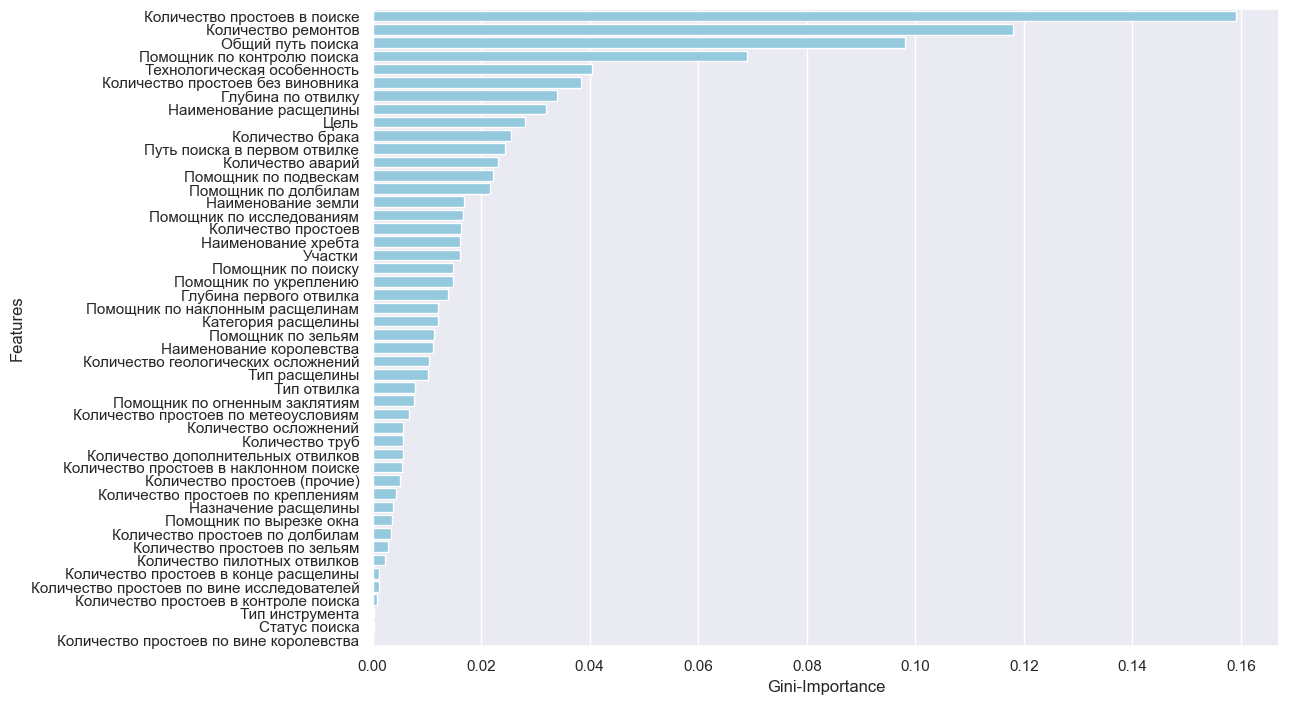

In [39]:
feats = {}
for feature, importance in zip(X_train.columns, model.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')

In [70]:
feat_imp = list(importances['Features'].head(5))

In [71]:
df_reg_test = df_test.loc[:, feat_imp]

In [72]:
feat_imp.append('Общее время разработки')
df_reg_train = df_train.loc[:, feat_imp]
df_reg_train.head(2)

,Количество простоев в поиске,Количество ремонтов,Общий путь поиска,Помощник по контролю поиска,Технологическая особенность,Общее время разработки
0,3.6,3.6,2889.0,Геральт и Компания,наклонная,1008000.0
1,0.0,24.3,5620.5,,горизонтальная + отвилков 40,4941000.0


In [81]:
le = LabelEncoder()

df_reg_train.loc[:, 'Технологическая особенность'] = le.fit_transform(df_reg_train.loc[:, 'Технологическая особенность'])
df_reg_train.loc[:, 'Помощник по контролю поиска'] = le.fit_transform(df_reg_train.loc[:, 'Помощник по контролю поиска'])

df_reg_test.loc[:, 'Технологическая особенность'] = le.fit_transform(df_reg_test.loc[:, 'Технологическая особенность'])
df_reg_test.loc[:, 'Помощник по контролю поиска'] = le.fit_transform(df_reg_test.loc[:, 'Помощник по контролю поиска'])

In [112]:
df_reg_train['Количество простоев в поиске'] = df_reg_train['Количество простоев в поиске'].fillna(df_reg_train['Количество простоев в поиске'].mode().iloc[0])
df_reg_train['Количество ремонтов'] = df_reg_train['Количество ремонтов'].fillna(df_reg_train['Количество ремонтов'].mode().iloc[0])
df_reg_train['Общий путь поиска'] = df_reg_train['Общий путь поиска'].fillna(df_reg_train['Общий путь поиска'].mode().iloc[0])

df_reg_test['Количество ремонтов'] = df_reg_test['Количество ремонтов'].fillna(df_reg_test['Количество ремонтов'].mode().iloc[0])
df_reg_test['Количество простоев в поиске'] = df_reg_test['Количество простоев в поиске'].fillna(df_reg_test['Количество простоев в поиске'].mode().iloc[0])

In [114]:
X_train = df_reg_train.drop(['Общее время разработки'], axis=1)
y_train = pd.DataFrame({'Общее время разработки' : df_reg_train['Общее время разработки']})
X_test = df_reg_test.copy()

In [115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(model,
                      X_train,
                      y_train,
                      scoring='neg_mean_squared_error',
                      cv=5)

mse.mean()

np.float64(-3564448515533.4717)

In [135]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alpha_values = {'alpha': [i for i in range(1, 200, 1)]}

ridge = GridSearchCV(Ridge(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=5)

# обучение модели 
print('Лучшее значение alpha:', ridge.fit(X_train, y_train).best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', ridge.fit(X_train, y_train).best_score_)

Лучшее значение alpha: {'alpha': 199}
Метрика качества: -3564256293717.5493


In [126]:
from sklearn.linear_model import Lasso

alpha_values = {'alpha': [i for i in range(1, 200, 1)]}

lasso = GridSearchCV(Lasso(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=5)

print('Лучшее значение alpha:', lasso.fit(X_train, y_train).best_params_)

print('Метрика качества:', lasso.fit(X_train, y_train).best_score_)

Лучшее значение alpha: {'alpha': 185}
Метрика качества: -3564447725691.8057


In [147]:
from sklearn.linear_model import ElasticNet

alpha_values = {'alpha': [0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
                
elastic = GridSearchCV(ElasticNet(),
                       alpha_values,
                       scoring='neg_mean_squared_error',
                       cv=5)

In [148]:
print(elastic.fit(X_train, y_train).best_params_)

print(elastic.fit(X_train, y_train).best_score_)

{'alpha': 50, 'l1_ratio': 0.6}
-3513460706600.8867


In [164]:
model.coef_

array([[47067.68180348, 65955.80904133,   275.83126817,  -512.69593603,
        -6656.6340131 ]])

In [168]:
best_ridge = Ridge(alpha=199).fit(X_train, y_train)

In [ ]:
best_lasso = Lasso(alpha=185).fit(X_train, y_train)

array([47076.53799597, 65939.02647912,   275.83818773,  -512.65231087,
       -6656.54509693])

In [171]:
best_elastic = ElasticNet(alpha=50, l1_ratio=0.6).fit(X_train, y_train)

In [172]:
y_test = best_elastic.predict(X_test)
df_res = df_test[['Наименование королевства', 'Наименование земли', 'Наименование хребта', 'Наименование расщелины']]
df_res['Срок нахождение артефакта'] = y_test
df_res

,Наименование королевства,Наименование земли,Наименование хребта,Наименование расщелины,Срок нахождение артефакта
5996,Верден,Вахт,831,9282,3.765436e+06
9579,Темерия,Умбра,6113,7746,3.807345e+06
10209,Кэдвен,Приобия,2279,801,4.225082e+06
10397,Кэдвен,Приобия,222,6831,3.872579e+06
10608,Кэдвен,Приобия,933,4407,2.922743e+06
...,...,...,...,...,...
13400,Лирия и Ривия,Тазор,2.49,2657,2.817135e+06
13407,Каэд Ду,НовыйПортен,1210,6118,3.030409e+06
13408,Темерия,Вингар,458,6007,2.926178e+06
13413,Лирия и Ривия,Тазор,2.54,5309,2.925948e+06


In [ ]:
y_test = model.predict(X_test)
df_res = df_test[['Наименование королевства', 'Наименование земли', 'Наименование хребта', 'Наименование расщелины']]
df_res['Срок нахождение артефакта'] = y_test
df_res